In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset

df = pd.read_csv('codon_usage.csv', low_memory=False) # Dataset has columns of mixed dtypes (?) We will keep the low_memory arg to False

## Data Manipulation

In [4]:
df.describe() # Describing dataframe

,DNAtype,SpeciesID,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13028.000000,13028.000000,1.302800e+04,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,...,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,0.367209,130451.105926,7.960576e+04,0.020637,0.014104,0.017820,0.018288,0.019044,0.018450,0.028352,...,0.005454,0.009929,0.006422,0.024178,0.021164,0.028290,0.021683,0.001645,0.000592,0.006178
std,0.688726,124787.086107,7.197010e+05,0.020709,0.009280,0.010586,0.014572,0.024250,0.016578,0.017507,...,0.006605,0.008574,0.006387,0.013828,0.013041,0.014342,0.015018,0.001834,0.000907,0.010344
min,0.000000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28850.750000,1.602000e+03,0.005610,0.007108,0.010890,0.007830,0.005307,0.007180,0.016360,...,0.001220,0.001690,0.001170,0.012380,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,81971.500000,2.927500e+03,0.015260,0.013360,0.016130,0.014560,0.009685,0.012800,0.025475,...,0.003530,0.009270,0.004545,0.025420,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,222891.250000,9.120000e+03,0.029485,0.019810,0.022730,0.025112,0.017245,0.024315,0.038113,...,0.007150,0.015922,0.010250,0.034190,0.027690,0.036800,0.031122,0.002370,0.000830,0.002890
max,12.000000,465364.000000,4.066258e+07,0.151330,0.101190,0.089780,0.100350,0.163920,0.107370,0.154060,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


In [5]:
df.head(10)  # Peek

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
5,vrl,0,101029,5274,Human adenovirus type 7d,0.02579,0.02218,0.01479,0.01024,0.02294,...,0.00303,0.01593,0.00171,0.02427,0.02503,0.02825,0.01270,0.00133,0.00038,0.00209
6,vrl,0,101688,3042,Apple latent spherical virus,0.04635,0.01545,0.02005,0.02400,0.02761,...,0.00329,0.01315,0.00822,0.04011,0.01183,0.02663,0.02663,0.00033,0.00033,0.00000
7,vrl,0,101764,2801,Aconitum latent virus,0.02285,0.02678,0.01214,0.02321,0.01714,...,0.00678,0.01250,0.01107,0.03534,0.01571,0.03642,0.02785,0.00107,0.00036,0.00071
8,vrl,0,101947,2897,Pseudorabies virus Ea,0.01105,0.02106,0.00035,0.00104,0.00035,...,0.02658,0.00207,0.00311,0.00414,0.04556,0.00449,0.04867,0.00138,0.00035,0.00138
9,vrl,0,10249,61247,Vaccinia virus Copenhagen,0.03411,0.0143,0.02771,0.01869,0.01148,...,0.00167,0.02230,0.00411,0.04866,0.01559,0.03695,0.01412,0.00250,0.00077,0.00103


In [6]:
df.info() # Info about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

Dataset contains 13028 entries that describe each organism's codon bias levels. Each column describes the Kingdom, DNA Type, Number of Codons, and the different 64 codon levels, as well as the species information. For our goals, the SpeciesName is just descritive so we discard it - as for the SpeciesID, we could use it for indexing each row.

In [7]:
df = df.set_index('SpeciesID') # Sets index of each row with Species ID

clean_dataset = df.drop('SpeciesName', axis=1) # Drop Species Name col
clean_dataset.head(5)

,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
SpeciesID,,,,,,,,,,,,,,,,,,,,,
100217,vrl,0,1995,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
100220,vrl,0,1474,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
100755,vrl,0,4862,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
100880,vrl,0,1915,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
100887,vrl,0,22831,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [8]:
clean_dataset.describe()

,DNAtype,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13028.000000,1.302800e+04,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,...,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,0.367209,7.960576e+04,0.020637,0.014104,0.017820,0.018288,0.019044,0.018450,0.028352,0.025041,...,0.005454,0.009929,0.006422,0.024178,0.021164,0.028290,0.021683,0.001645,0.000592,0.006178
std,0.688726,7.197010e+05,0.020709,0.009280,0.010586,0.014572,0.024250,0.016578,0.017507,0.014600,...,0.006605,0.008574,0.006387,0.013828,0.013041,0.014342,0.015018,0.001834,0.000907,0.010344
min,0.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.602000e+03,0.005610,0.007108,0.010890,0.007830,0.005307,0.007180,0.016360,0.015130,...,0.001220,0.001690,0.001170,0.012380,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,2.927500e+03,0.015260,0.013360,0.016130,0.014560,0.009685,0.012800,0.025475,0.021540,...,0.003530,0.009270,0.004545,0.025420,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,9.120000e+03,0.029485,0.019810,0.022730,0.025112,0.017245,0.024315,0.038113,0.031860,...,0.007150,0.015922,0.010250,0.034190,0.027690,0.036800,0.031122,0.002370,0.000830,0.002890
max,12.000000,4.066258e+07,0.151330,0.101190,0.089780,0.100350,0.163920,0.107370,0.154060,0.088600,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


It may seem out of place, but we have 4 different object types in the attributes.If we look at the 'df.info()' function call, we also have columns 'UUU' and 'UUC' as objects, which doesn't make sense, they should be of type float64.

In [9]:
clean_dataset['UUU'] = clean_dataset['UUU'].astype('float64')
clean_dataset['UUC'] = clean_dataset['UUC'].astype('float64')

ValueError: could not convert string to float: 'non-B hepatitis virus'

Running the last cell, we get a ValueError that we couldn't convert 'non-B hepatitis virus' to a float... By trial and error, and luckily, we only have two strings mixed with the float values in the column. As for the 'UUC' column, we sometimes have '-', which we could replace with NaN.

In [10]:
# Replace different values with NaN
clean_dataset['UUU'] = clean_dataset['UUU'].replace(['non-B hepatitis virus','12;I'],'NaN')

clean_dataset['UUC'] = clean_dataset['UUC'].replace('-', 'NaN')

In [11]:
# Transforming to a different dtype again

clean_dataset['UUU'] = clean_dataset['UUU'].astype('float64')
clean_dataset['UUC'] = clean_dataset['UUC'].astype('float64')

In [12]:
# Check

clean_dataset.isnull().sum().sort_values()

Kingdom    0
UCG        0
AGU        0
AGC        0
ACU        0
          ..
GCU        0
CCC        0
UGA        0
UUC        1
UUU        2
Length: 67, dtype: int64

We now have 3 missing values in the dataset, which is not a big deal for such a small number of samples, we could just delete those entries by using the dropna function from pandas, but, it's not an interesting approach, as we need even more data for our models to perform well. We are going to fill those missing spaces with the column mean.

In [13]:
UUU_mean = clean_dataset['UUU'].mean()

clean_dataset['UUU'].fillna(value=UUU_mean, inplace=True)

UUC_mean = clean_dataset['UUC'].mean()

clean_dataset['UUC'].fillna(value=UUC_mean, inplace=True)

In [14]:
# Check again for missing values
clean_dataset.isnull().sum().sort_values(ascending=False)[:5]

Kingdom    0
CAU        0
AGU        0
AGC        0
ACU        0
dtype: int64

In [15]:
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13028 entries, 100217 to 9606
Data columns (total 67 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Kingdom  13028 non-null  object 
 1   DNAtype  13028 non-null  int64  
 2   Ncodons  13028 non-null  int64  
 3   UUU      13028 non-null  float64
 4   UUC      13028 non-null  float64
 5   UUA      13028 non-null  float64
 6   UUG      13028 non-null  float64
 7   CUU      13028 non-null  float64
 8   CUC      13028 non-null  float64
 9   CUA      13028 non-null  float64
 10  CUG      13028 non-null  float64
 11  AUU      13028 non-null  float64
 12  AUC      13028 non-null  float64
 13  AUA      13028 non-null  float64
 14  AUG      13028 non-null  float64
 15  GUU      13028 non-null  float64
 16  GUC      13028 non-null  float64
 17  GUA      13028 non-null  float64
 18  GUG      13028 non-null  float64
 19  GCU      13028 non-null  float64
 20  GCC      13028 non-null  float64
 21  GCA     

We can now proceed to feed this dataset into our models, as there are no missing values and the data is clean.

In [16]:
X = clean_dataset.drop(['Kingdom', 'DNAtype'], axis=1)

y_kingdom = clean_dataset.Kingdom

y_DNAt = clean_dataset.DNAtype

## Exploring models

Before classifying our instances we need to split the data to 2 sets, Training and Test. We are going to use a 70/30 ratio and train our models with 5-Fold Cross Validation on the Train set.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

'''
Calculates Accuracy, Precision, Recall and F1 metrics
Plots confusion matrix
'''
def obtain_metrics(dataset, predictions, actual_y):
    
    # Get scores
    acc = accuracy_score(predictions, actual_y)
    prec = precision_score(predictions, actual_y, average='weighted')
    rec = recall_score(predictions, actual_y, average='weighted')
    f1 = f1_score(predictions, actual_y, average='weighted') 
    
    # Build confusion matrix
    cm = confusion_matrix(actual_y, predictions)
    
    print(f"Accuracy score: {acc}\n\
            Precision score: {prec}\n\
            Recall score: {rec}\n\
            F1 Score: {f1}.")
    
    # Plot the confusion matrix
    plt.figure(figsize=(15, 15))
    sns.heatmap(cm, annot=True)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
##


# Sets for classifying Kingdom
X_train, X_test, y_train, y_test = train_test_split(X, y_kingdom, test_size=0.3, random_state=42)

# Sets for classifying DNA Type
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(X, y_DNAt, test_size=0.3, random_state=42)

### Decision Tree

In [99]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree_param = {
                'criterion': ['gini', 'entropy'],
                'max_depth': [10, 15, 20, 40],
                'min_samples_leaf': [2, 5, 10, 20]
}

dtgs = GridSearchCV(tree, tree_param, cv=5)

In [100]:
# Grid Search to find best params for Decision Tree

#dtgs.fit(X, y_kingdom)
dtgs.fit(X, y_DNAt)

/home/leonel/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 40],
                         'min_samples_leaf': [2, 5, 10, 20]})

In [101]:
# Best Decision Tree Params
print(dtgs.best_params_)

best_decision_tree = dtgs.best_estimator_

{'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 20}


In [102]:
best_decision_tree.fit(X_train, y_train)

tree_preds = best_decision_tree.predict(X_test)

/home/leonel/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score: 0.7475057559478128
            Precision score: 0.7641231490329178
            Recall score: 0.7475057559478128
            F1 Score: 0.7536437182600693.


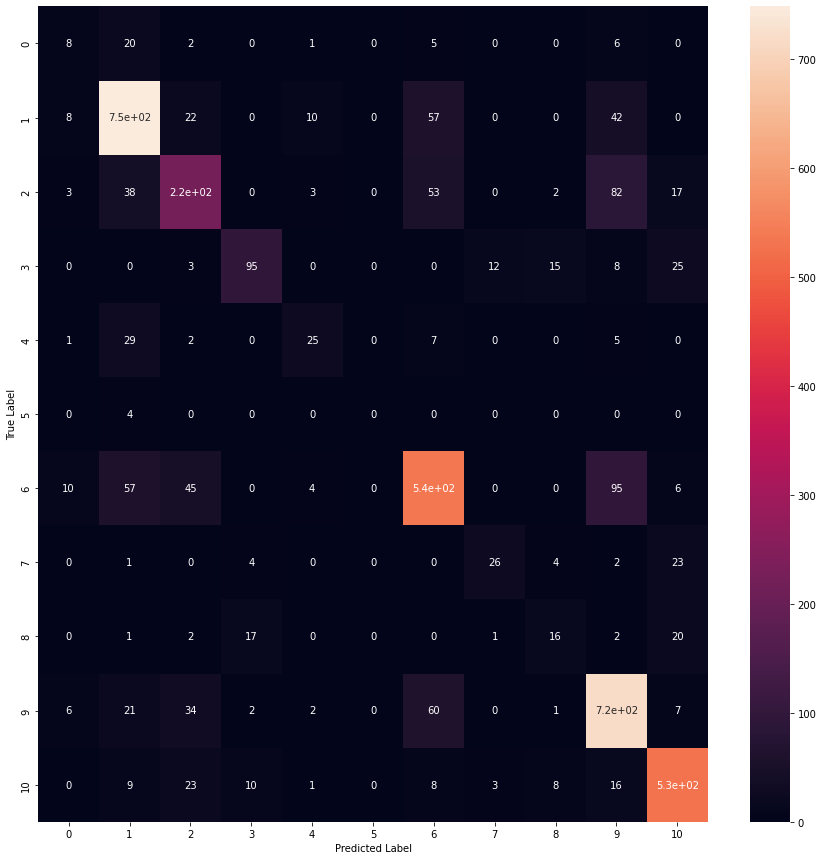

In [103]:
obtain_metrics(y_kingdom.unique(), tree_preds, y_test)

### K-Nearest Neighbors

In [104]:
# Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_params = { 'n_neighbors': [1, 5, 10, 15],
               'weights': ['uniform', 'distance'] }

knn_grid = GridSearchCV(knn, knn_params, cv=5)

In [105]:
#knn_grid.fit(X, y_kingdom)
knn_grid.fit(X, y_DNAt)

/home/leonel/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 5, 10, 15],
                         'weights': ['uniform', 'distance']})

In [106]:
print(knn_grid.best_params_)

best_knn = knn_grid.best_estimator_

{'n_neighbors': 5, 'weights': 'uniform'}


In [107]:
best_knn.fit(X_train, y_train)

knn_preds = best_knn.predict(X_test)

print(accuracy_score(knn_preds, y_test))

0.34331030954208236


/home/leonel/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score: 0.34331030954208236
            Precision score: 0.3752080607300616
            Recall score: 0.34331030954208236
            F1 Score: 0.35228494690271345.


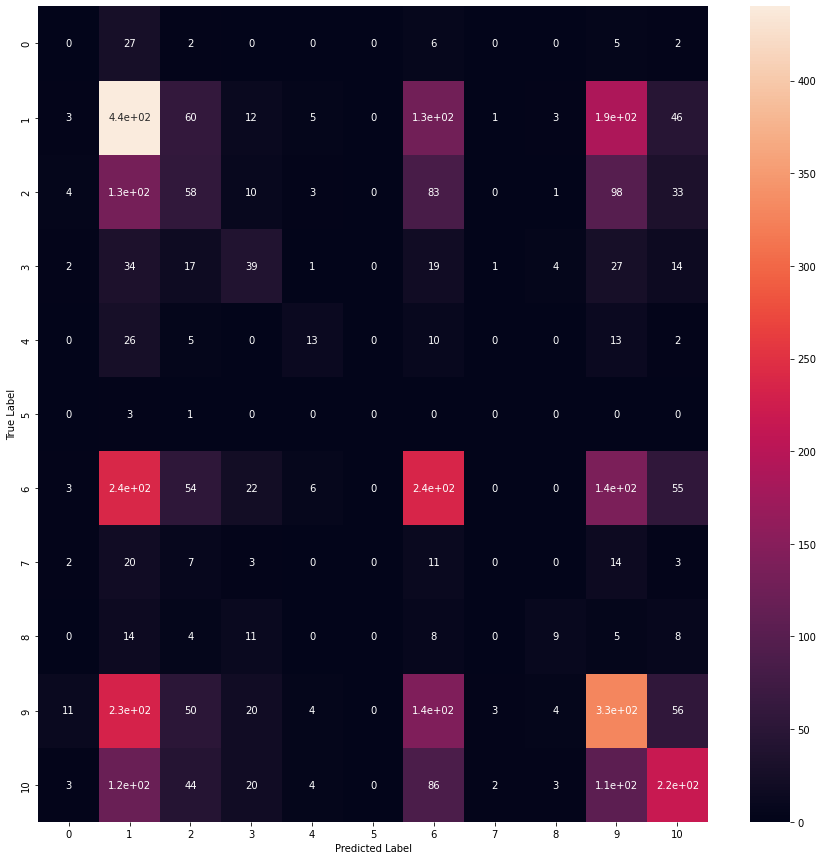

In [108]:
obtain_metrics(y_kingdom.unique(), knn_preds, y_test)

### Neural Networks

In [109]:
# Multi Layer Perceptron

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000)

mlp_params = {
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.05],
}

mlp_grid = GridSearchCV(mlp, mlp_params, cv=5)

In [110]:
#mlp_grid.fit(X, y_kingdom)
mlp_grid.fit(X, y_DNAt)

/home/leonel/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05]})

In [111]:
print(mlp_grid.best_params_)

best_mlp = mlp_grid.best_estimator_

{'activation': 'tanh', 'alpha': 0.0001}


In [112]:
best_mlp.fit(X_train, y_train)

mlp_preds = best_mlp.predict(X_test)

/home/leonel/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score: 0.21770273727295983
            Precision score: 1.0
            Recall score: 0.21770273727295983
            F1 Score: 0.35756302521008404.


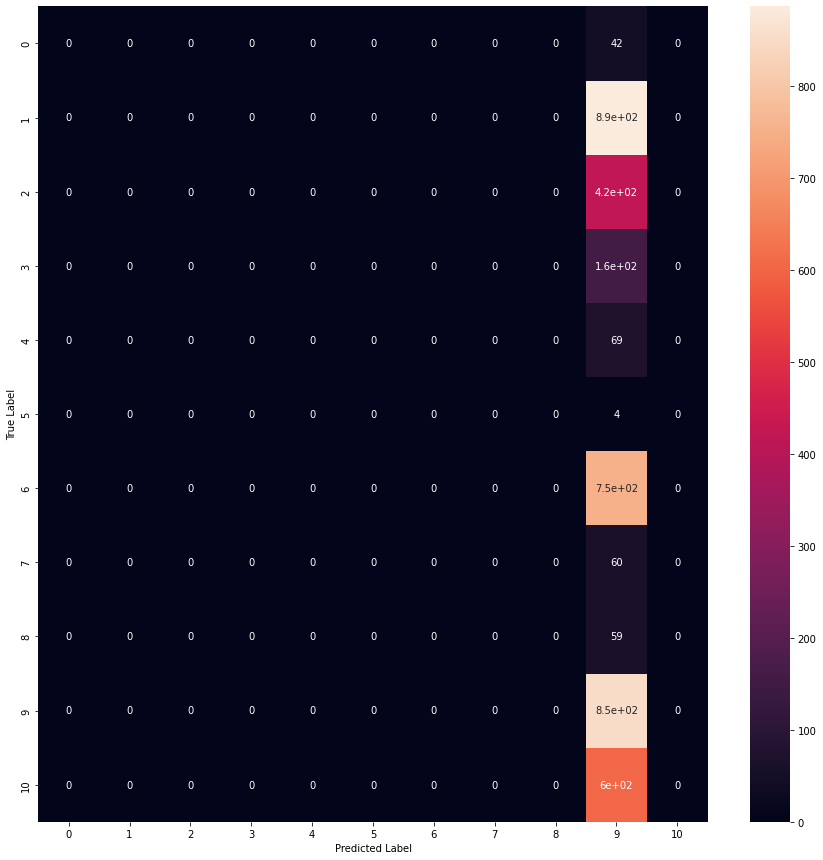

In [113]:
obtain_metrics(y_kingdom.unique(), mlp_preds, y_test)

### Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf_params = { 
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [5, 10, 15],
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=10)

In [115]:
#rf_grid.fit(X, y_kingdom)
rf_grid.fit(X, y_DNAt)

/home/leonel/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 500]})

In [116]:
print(rf_grid.best_params_)

best_rf = rf_grid.best_estimator_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}


In [117]:
best_rf.fit(X_train, y_train)

rf_preds = best_rf.predict(X_test)

/home/leonel/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score: 0.8434382194934766
            Precision score: 0.8861111920246146
            Recall score: 0.8434382194934766
            F1 Score: 0.8558246774839452.


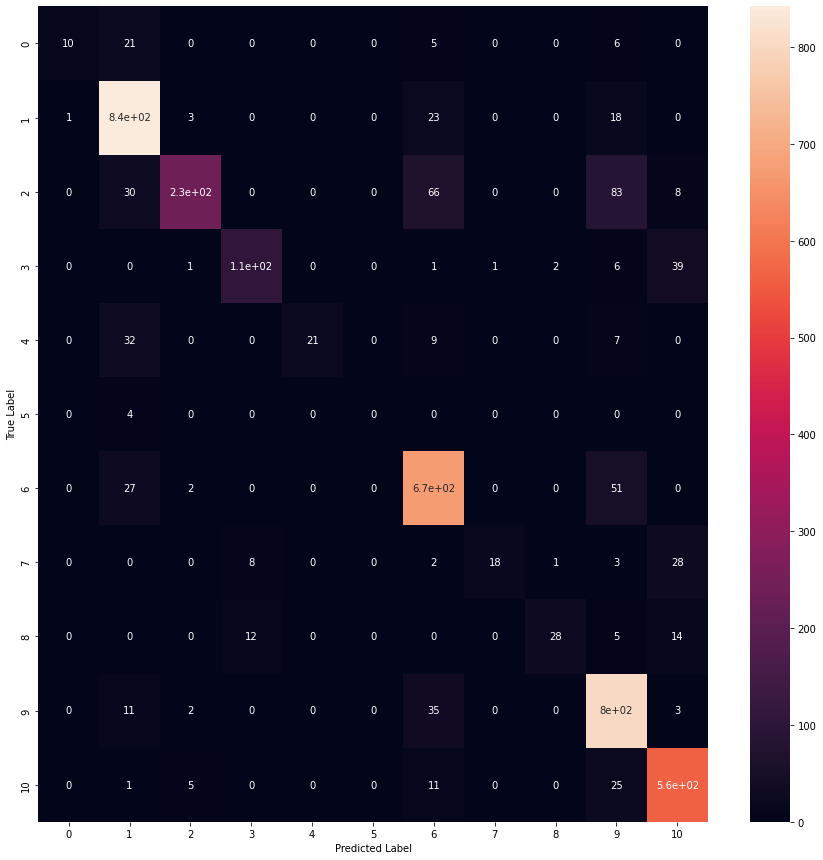

In [118]:
obtain_metrics(y_kingdom.unique(), rf_preds, y_test)

### AdaBoost

In [119]:
from sklearn.ensemble import AdaBoostClassifier

# We'll use the best Random Forest classifier as a base estimator to boost

abc = AdaBoostClassifier(base_estimator=best_rf)

abc.fit(X_train, y_train)

abc_preds = abc.predict(X_test)

/home/leonel/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score: 0.882322844717319
            Precision score: 0.9102545775991292
            Recall score: 0.882322844717319
            F1 Score: 0.8914695393581444.


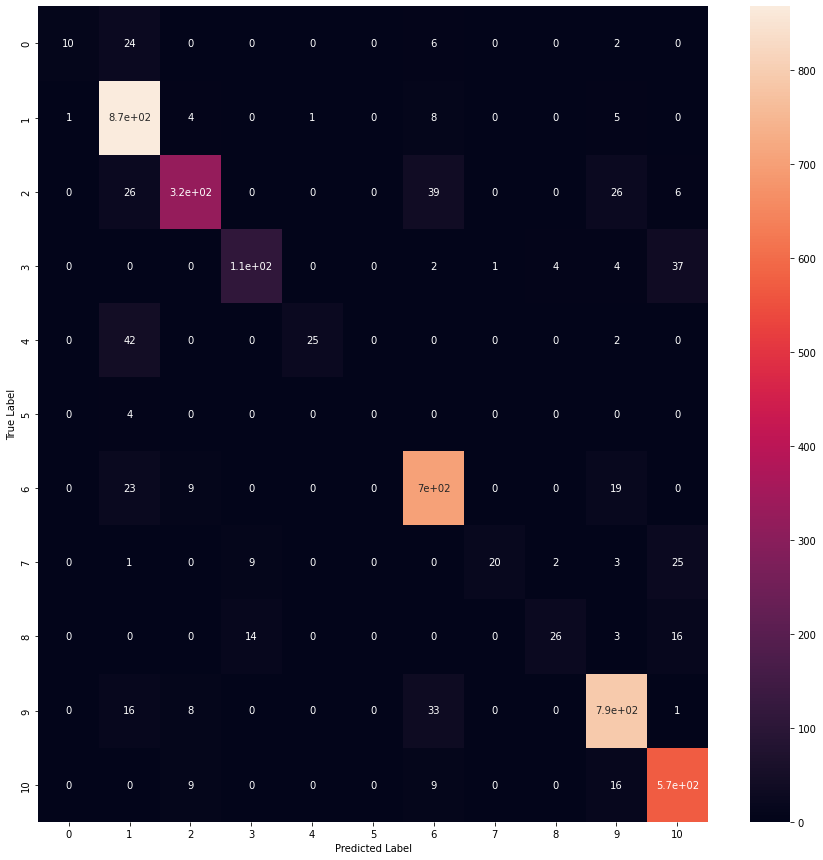

In [120]:
obtain_metrics(y_kingdom.unique(), abc_preds, y_test)

## Clustering



In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 11, random_state = 42)